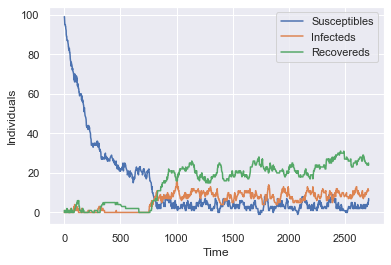

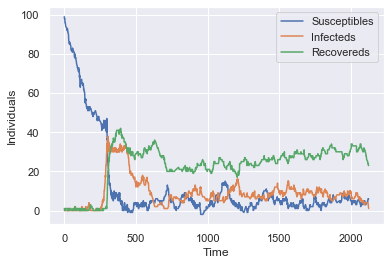

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
import pandas as pd


class Gillespie:

    def __init__(self):
        self.beta = 1/3
        self.gamma = 0.01
        self.mu = 0.003
        self.N = 100
        self.X = 99
        self.Y = 1
        self.Z = 0
        self.T = 0

    def get_rates(self, X, Y, Z):
        """
        Determine at which rate an event occurs.
        """
        rate_E1 = self.mu * self.N
        rate_E2 = self.beta * self.X * self.Y / self.N
        rate_E3 = self.gamma * self.Y
        rate_E4 = self.mu * self.X
        rate_E5 = self.mu * self.Y
        rate_E6 = self.mu * self.Z

        events = [rate_E1, rate_E2, rate_E3, rate_E4, rate_E5, rate_E6]

        return events

    def gillespie(self):
        """
        Choose the next time and event.
        """

        # Generate two random numbers between 0 and 1.
        random_time = np.random.rand()

        events = self.get_rates(self.X, self.Y, self.Z)

        Rtotal = sum(events)

        # Get reaction time
        tau = (1.0/Rtotal) * np.log((1.0/random_time))
        self.T += tau

        # Determine which event occurs
        # Make list of reaction intervals
        rates = []
        for i in events:
            rates.append(i/Rtotal)

        random_event = random.uniform(0, max(rates))

        # Find event to be executed based on closest number to
        # a random number in rates-array
        found = self.find_nearest(rates, random_event)

        # Retrieve which event is related to this interval
        for k in range(len(rates)):
            if rates[k] == found:
                index = k
                break

        # Birth
        if index == 0:
            self.X += 1

        # Transmission
        elif index == 1:
            self.Y += 1
            self.X -= 1

        # Recovery
        elif index == 2:
            self.Z += 1
            self.Y -= 1

        # Death
        elif index == 3:
            self.X -= 1
        elif index == 4:
            self.Y -= 1
        else:
            self.Z -= 1

        return self.X, self.Y, self.Z, self.T

    def find_nearest(self, array, value):
        """
        Find nearest value in array.
        """

        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]


if __name__ == '__main__':

    for i in range(2):
        gillespie = Gillespie()

        plots = []
        time = []

        for j in range(1500):
            X, Y, Z, T = gillespie.gillespie()
            plots.append([X, Y, Z])
            time.append(T)


        # plt.plot(time, Xs)
        plt.plot(time, plots)
        plt.legend(['Susceptibles', 'Infecteds', 'Recovereds'], loc="upper right")
        plt.xlabel("Time")
        plt.ylabel("Individuals")
        plt.show()


## 1. Variability
### Run several models with the same initial conditions to do a statistical analysis on variance

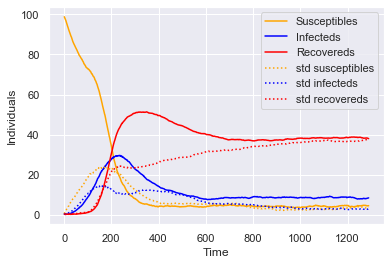

Fixed point for X =  4.63
Fixed point for Y =  8.54
Fixed point for Z =  38.04

Mean of X =  20.578239999999997 variance =  26.457746338310827
Mean of Y =  13.67671 variance =  7.970676663615204
Mean of Z =  33.686370000000004 variance =  15.302886881993867


In [142]:
totalX = []
totalY = []
totalZ = []
totalT = []

for i in range(100): 
    gillespie = Gillespie()

    plots = []
    time = []
    Xs = []
    Ys = []
    Zs = []
    Ts = []


    for j in range(1000):
        X, Y, Z, T = gillespie.gillespie()
        plots.append([X, Y, Z])
        time.append(T)
        Xs.append(X)
        Ys.append(Y)
        Zs.append(Z)
        Ts.append(T)

    totalX.append(Xs)
    totalY.append(Ys)
    totalZ.append(Zs)
    totalT.append(Ts)
    

# Calculate means
meansX = [np.mean([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
barsX = [np.std([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
meansY = [np.mean([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
barsY = [np.std([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
meansZ = [np.mean([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
barsZ = [np.std([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
totalT = [np.mean([x[i] for x in totalT if len(x) > i]) for i in range(len(max(totalT,key=len)))]

# TODO: errorbars plotten om variatie te laten zien of confidence interval (seaborn?)
plt.plot(totalT, meansX, color="orange")
plt.plot(totalT, meansY, color="blue")
plt.plot(totalT, meansZ, color="red")
plt.plot(totalT, barsX, color="orange", linestyle=":")
plt.plot(totalT, barsY, color="blue", linestyle=":")
plt.plot(totalT, barsZ, color="red", linestyle=":")
plt.legend(['Susceptibles', 'Infecteds', 'Recovereds', "std susceptibles", "std infecteds", "std recovereds"], loc="upper right")
plt.xlabel("Time")
plt.ylabel("Individuals")
plt.show()


print("Fixed point for X = ", meansX[-1])
print("Fixed point for Y = ", meansY[-1])
print("Fixed point for Z = ", meansZ[-1])
print("")
print("Mean of X = ", np.mean(meansX), "variance = ", np.std(meansX))
print("Mean of Y = ", np.mean(meansY), "variance = ", np.std(meansY))
print("Mean of Z = ", np.mean(meansZ), "variance = ", np.std(meansZ))



## 2. Covariance between S and I

In [117]:
from statistics import mean


def covariance(S, I, n):
    """Takes in two lists of S and I values throughout n runs, computes covariance, 
    returns average covariance between S & I"""
    covariances = []
    for i in range(n):
        cov = np.cov(S[i],I[i])
        covariances.append(cov[0][1])
        
    # TODO: Calculate mean population levels    
    return mean(covariances)


    

covariance =  -16.68452525252526
P extinction =  0.03900000000000001


## 3. Increased transients

## 4. Stochastic resonance

## 5. Extinction

In [120]:

def extinction(beta,gamma,mu):
    R0 = beta / (gamma + mu)
    Pext = 1 / R0
    return Pext


# Runs 2 simulations, prints covariance and P(extinction)
S = []
I = []
n = 5
beta, gamma, mu = 1/3, 0.01, 0.003

for i in range(n):
    
    gillespie = Gillespie()
    
    sus = []
    inf = []
    
    for i in range(100):
        X,Y,Z,T = gillespie.gillespie()
        sus.append(X)
        inf.append(Y)
    S.append(sus)
    I.append(inf)

print("covariance = ", covariance(S, I, n))
print("P extinction = ", extinction(beta, gamma, mu))

covariance =  -13.784646464646473
P extinction =  0.03900000000000001
